In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import math

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")

In [4]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
data = data.drop(["loan_id"], axis=1)

In [6]:
data.shape

(4269, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


### Encoding the categorical features

In [8]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data[" education"] = le.fit_transform(data[" education"])
data[" self_employed"] = le.fit_transform(data[" self_employed"])
data[" loan_status"] = le.fit_transform(data[" loan_status"])

In [9]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


In [10]:
data.describe().style.background_gradient(cmap="Blues")

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
count,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000,4269.000000
mean,2.498712,0.497775,0.503631,5059123.916608,15133450.456781,10.900445,599.936051,7472616.537831,4973155.305692,15126305.926446,4976692.433825,0.377840
std,1.695910,0.500054,0.500045,2806839.831818,9043362.984843,5.709187,172.430401,6503636.587664,4388966.089638,9103753.665256,3250185.305696,0.484904
min,0.000000,0.000000,0.000000,200000.000000,300000.000000,2.000000,300.000000,-100000.000000,0.000000,300000.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,2700000.000000,7700000.000000,6.000000,453.000000,2200000.000000,1300000.000000,7500000.000000,2300000.000000,0.000000
50%,3.000000,0.000000,1.000000,5100000.000000,14500000.000000,10.000000,600.000000,5600000.000000,3700000.000000,14600000.000000,4600000.000000,0.000000
75%,4.000000,1.000000,1.000000,7500000.000000,21500000.000000,16.000000,748.000000,11300000.000000,7600000.000000,21700000.000000,7100000.000000,1.000000
max,5.000000,1.000000,1.000000,9900000.000000,39500000.000000,20.000000,900.000000,29100000.000000,19400000.000000,39200000.000000,14700000.000000,1.000000


In [11]:
data.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

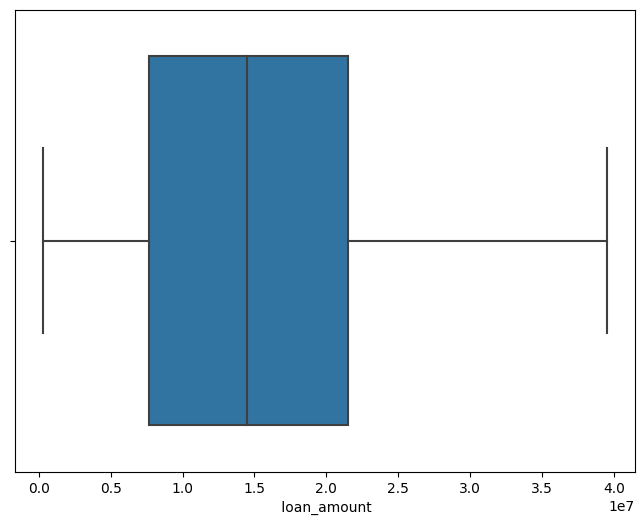

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(data,x=" loan_amount")
plt.show()

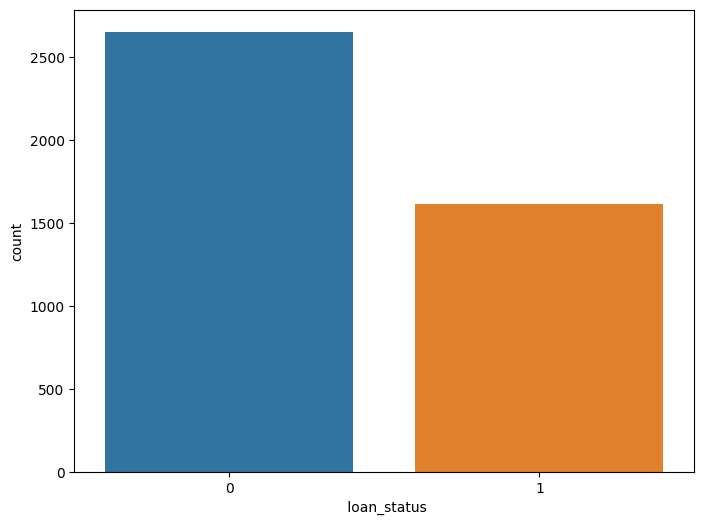

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(data,x=" loan_status")
plt.show()

### 0 describes no.of approved loans and 1 describes no.of rejected loans

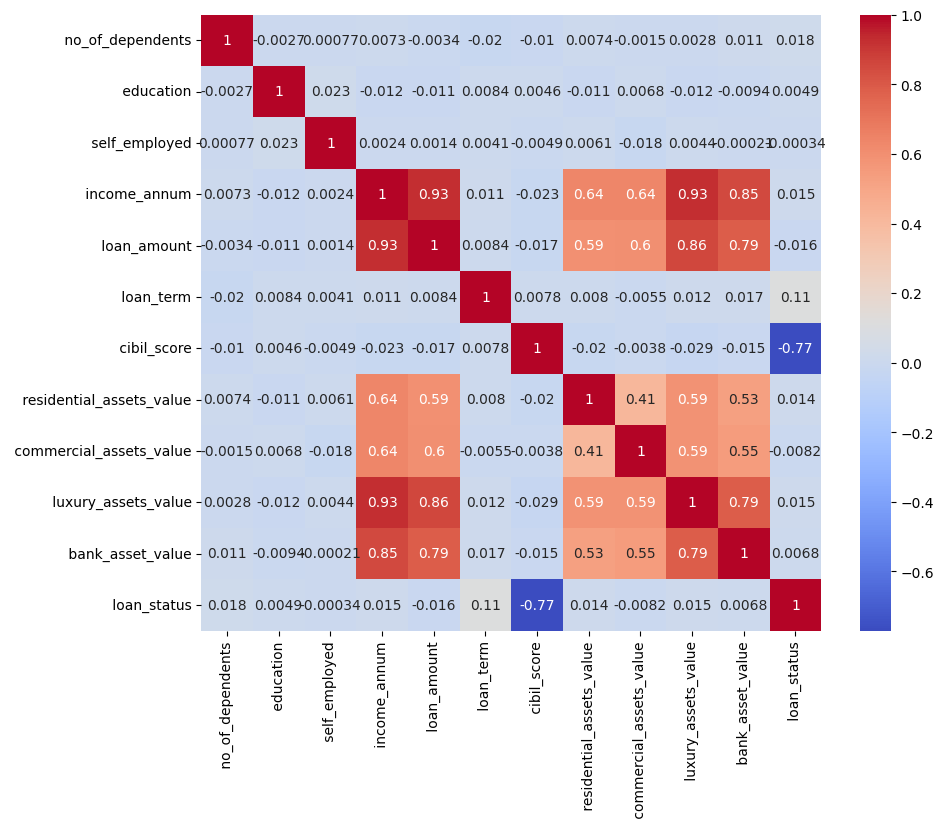

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.show()

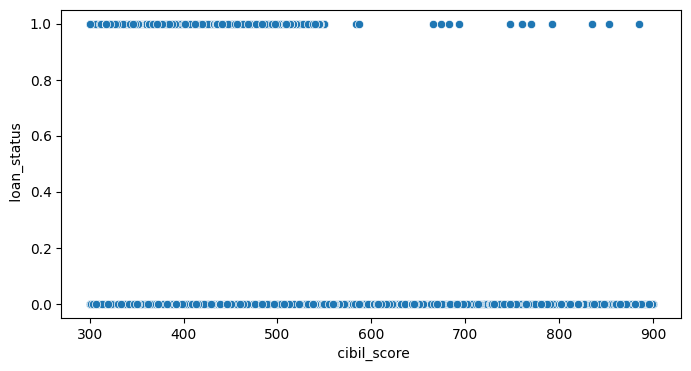

In [15]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=' cibil_score',y=' loan_status',data=data)
plt.show()

There are some outliers for rejected loan applications despite of having high cibil score. But loans were approved with cibil scores ranging from 300-900. 

# Data preparation and split

In [16]:
x = data.drop([" loan_status"],axis=1)
y = data[" loan_status"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           0       0.66      1.00      0.80       282
           1       1.00      0.01      0.03       145

    accuracy                           0.67       427
   macro avg       0.83      0.51      0.41       427
weighted avg       0.78      0.67      0.54       427

Accuracy of Logistic Regression is :  66.51053864168618


In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.33489461358313816
Mean Squared Error :  0.33489461358313816
Root Mean Squared Error :  0.5787007979803883
R2 Score :  -0.49329909513328385


# Decision Tree

In [19]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       282
           1       0.98      0.94      0.96       145

    accuracy                           0.97       427
   macro avg       0.98      0.97      0.97       427
weighted avg       0.97      0.97      0.97       427

Accuracy of Decision Tree is :  97.42388758782201


In [20]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.02576112412177986
Mean Squared Error :  0.02576112412177986
Root Mean Squared Error :  0.16050272309770902
R2 Score :  0.8851308388359013


# Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       282
           1       0.99      0.96      0.97       145

    accuracy                           0.98       427
   macro avg       0.98      0.98      0.98       427
weighted avg       0.98      0.98      0.98       427

Accuracy of Random Forest is is :  98.12646370023418


In [22]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

Mean Absolute Error :  0.01873536299765808
Mean Squared Error :  0.01873536299765808
Root Mean Squared Error :  0.13687718216583097
R2 Score :  0.9164587918806555


# Model Performance Evaluation

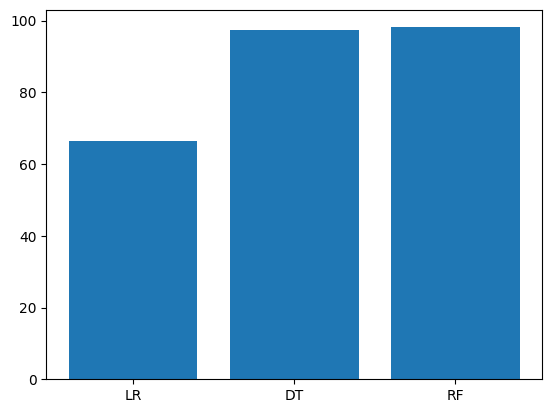

In [23]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()

# Feature Importance

In [24]:
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)
print(feature_importances)

                      feature  importance
6                 cibil_score    0.818265
5                   loan_term    0.058774
4                 loan_amount    0.029360
3                income_annum    0.017808
8     commercial_assets_value    0.017162
9         luxury_assets_value    0.017133
7    residential_assets_value    0.016281
10           bank_asset_value    0.013924
0            no_of_dependents    0.007084
1                   education    0.002256
2               self_employed    0.001953
